In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Sensitivity_Soil_Nutrient_Pools new.csv")

In [3]:
df.head()

,SampleID,site,block,paddock,plot,slope,rainfall_reduction,grazing_treatment,year,type,faith_pd
0,GMDR-FK-2018-4,FK,1,1,4,4,0,stable,2018,bacteria,3.912.908.739
1,GMDR-TB-2018-45,TB,3,2,45,2,50,heavy,2018,bacteria,3.298.556.468
2,GMDR-TB-2018-8,TB,1,3,8,1,75,destock,2018,bacteria,3.332.257.877
3,GMDR-TB-2018-31,TB,2,3,31,4,99,destock,2018,bacteria,3.806.342.641
4,GMDR-TB-2018-23,TB,2,2,23,6,0,heavy,2018,bacteria,4.135.953.774


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SampleID            1006 non-null   object
 1   site                1006 non-null   object
 2   block               1006 non-null   int64 
 3   paddock             1006 non-null   int64 
 4   plot                1006 non-null   int64 
 5   slope               1006 non-null   int64 
 6   rainfall_reduction  1006 non-null   int64 
 7   grazing_treatment   1006 non-null   object
 8   year                1006 non-null   int64 
 9   type                1006 non-null   object
 10  faith_pd            1006 non-null   object
dtypes: int64(6), object(5)
memory usage: 86.6+ KB


In [8]:
df.describe()

,block,paddock,plot,slope,rainfall_reduction,year
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,1.997018,2.005964,27.485089,3.037773,41.165010,2019.930417
std,0.817100,0.816475,15.529054,1.569791,36.765529,1.378993
min,1.000000,1.000000,1.000000,1.000000,0.000000,2018.000000
25%,1.000000,1.000000,14.000000,2.000000,0.000000,2019.000000
50%,2.000000,2.000000,27.500000,3.000000,25.000000,2020.000000
75%,3.000000,3.000000,41.000000,4.000000,75.000000,2021.000000
max,3.000000,3.000000,54.000000,6.000000,99.000000,2022.000000


In [9]:
df.isnull().sum()

SampleID              0
site                  0
block                 0
paddock               0
plot                  0
slope                 0
rainfall_reduction    0
grazing_treatment     0
year                  0
type                  0
faith_pd              0
dtype: int64

# Changing faith_pd from object type to int64 for which we have to remove (.) from its

In [11]:
df['faith_pd'] = df['faith_pd'].astype(str).str.replace('.', '', regex=False)
df['faith_pd'] = pd.to_numeric(df['faith_pd'], errors='coerce')

print(df.info())
print(df['faith_pd'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SampleID            1006 non-null   object
 1   site                1006 non-null   object
 2   block               1006 non-null   int64 
 3   paddock             1006 non-null   int64 
 4   plot                1006 non-null   int64 
 5   slope               1006 non-null   int64 
 6   rainfall_reduction  1006 non-null   int64 
 7   grazing_treatment   1006 non-null   object
 8   year                1006 non-null   int64 
 9   type                1006 non-null   object
 10  faith_pd            1006 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 86.6+ KB
None
0    3912908739
1    3298556468
2    3332257877
3    3806342641
4    4135953774
Name: faith_pd, dtype: int64


In [12]:
df.head()

,SampleID,site,block,paddock,plot,slope,rainfall_reduction,grazing_treatment,year,type,faith_pd
0,GMDR-FK-2018-4,FK,1,1,4,4,0,stable,2018,bacteria,3912908739
1,GMDR-TB-2018-45,TB,3,2,45,2,50,heavy,2018,bacteria,3298556468
2,GMDR-TB-2018-8,TB,1,3,8,1,75,destock,2018,bacteria,3332257877
3,GMDR-TB-2018-31,TB,2,3,31,4,99,destock,2018,bacteria,3806342641
4,GMDR-TB-2018-23,TB,2,2,23,6,0,heavy,2018,bacteria,4135953774


## How does the average faith_pd (phylogenetic diversity) vary between different grazing_treatment types (stable, heavy, destock)?

In [13]:
avg_diversity = df.groupby('grazing_treatment')['faith_pd'].mean()
print(avg_diversity)

grazing_treatment
destock    3.309569e+09
heavy      3.411866e+09
stable     3.472397e+09
Name: faith_pd, dtype: float64


C:\Users\Tanya\AppData\Local\Temp\ipykernel_9076\432028558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grazing_treatment', y='faith_pd', data=df, palette='viridis')


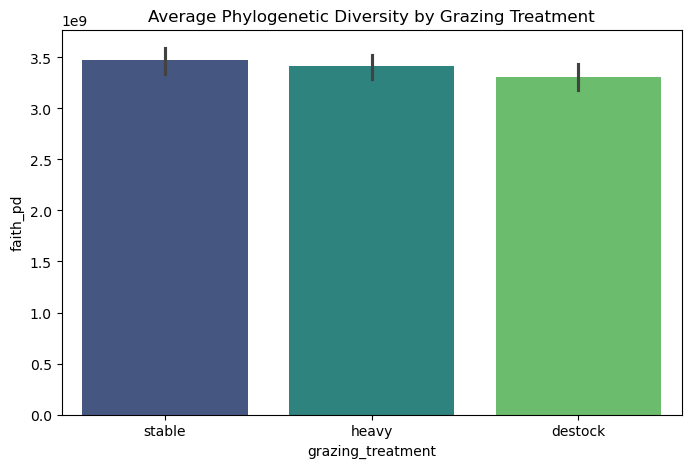

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='grazing_treatment', y='faith_pd', data=df, palette='viridis')
plt.title('Average Phylogenetic Diversity by Grazing Treatment')
plt.show()

#### According to the data, the 'Stable' grazing treatment maintains the highest microbial phylogenetic diversity (3.47e+09), while the 'Destock' treatment shows the lowest (3.31e+09). This indicates that grazing management significantly influences the soil's biological health, with stable management being the most favorable for microbial richness.

## Is there a significant difference in faith_pd between 'bacteria' and 'fungi' types?

In [14]:
type_comparison = df.groupby('type')['faith_pd'].mean()
print(type_comparison)

type
bacteria    3.441219e+09
fungi       3.352660e+09
Name: faith_pd, dtype: float64


C:\Users\Tanya\AppData\Local\Temp\ipykernel_9076\1680039090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='faith_pd', data=df, palette='Set2')


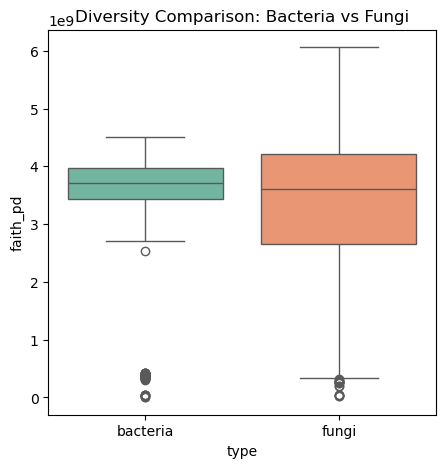

In [20]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='type', y='faith_pd', data=df, palette='Set2')
plt.title('Diversity Comparison: Bacteria vs Fungi')
plt.show()

#### Our analysis shows a clear distinction between microbial types, where Bacteria exhibit a higher average phylogenetic diversity (3.44e+09) than Fungi (3.35e+09). This higher bacterial diversity suggests that the soil ecosystem supports a more complex bacterial network, which is essential for efficient nutrient cycling and overall soil fertility

## What is the correlation between rainfall_reduction and faith_pd?

In [15]:
correlation = df['rainfall_reduction'].corr(df['faith_pd'])
print(f"Correlation: {correlation}")

Correlation: 0.05659661446673117


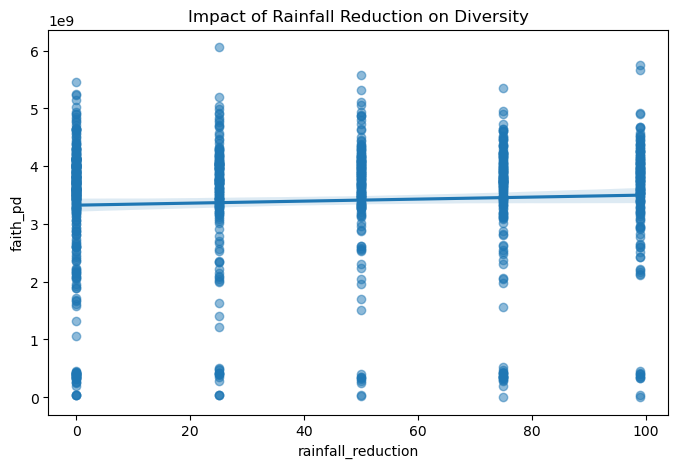

In [21]:
plt.figure(figsize=(8, 5))
sns.regplot(x='rainfall_reduction', y='faith_pd', data=df, scatter_kws={'alpha':0.5})
plt.title('Impact of Rainfall Reduction on Diversity')
plt.show()

#### The analysis yielded a correlation coefficient of $0.0566$ between rainfall reduction and phylogenetic diversity. This indicates a very weak positive correlation, suggesting that microbial diversity in this study area is relatively resilient to rainfall changes or is more heavily influenced by other environmental variables such as land management and site-specific characteristics rather than rainfall alone.

## Which site (FK or TB) shows higher average diversity over the years?

In [24]:
site_diversity = df.groupby('site')['faith_pd'].mean()
print(site_diversity)

site
FK    3.406943e+09
TB    3.386965e+09
Name: faith_pd, dtype: float64


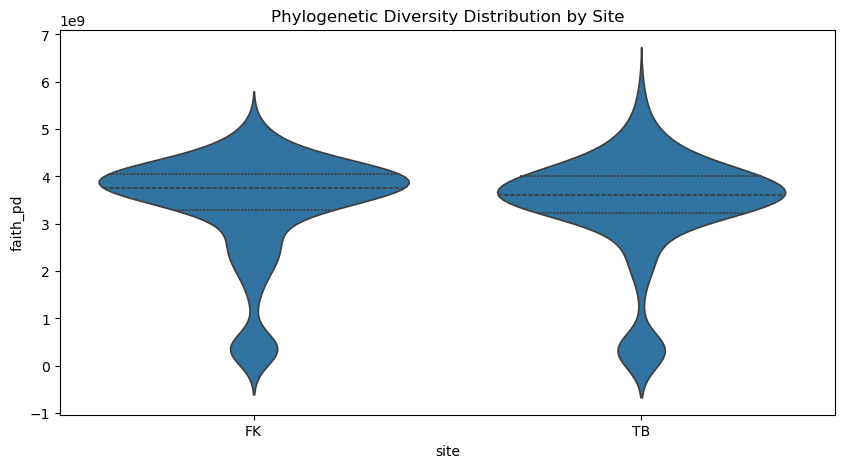

In [22]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='site', y='faith_pd', data=df, inner="quart")
plt.title('Phylogenetic Diversity Distribution by Site')
plt.show()

#### A comparison of the study sites reveals that Site FK exhibits a higher mean phylogenetic diversity (3.41e+09) compared to Site TB (3.39e+09). Although the margin is slight, this data point is crucial for understanding site-specific baseline diversity and suggests that Site FK may possess environmental characteristics that are marginally more conducive to a diverse microbial ecosystem

## How has the average faith_pd changed from 2018 to 2019?

In [18]:
yearly_trend = df.groupby('year')['faith_pd'].mean()
print(yearly_trend)

year
2018    3.774466e+09
2019    3.703184e+09
2020    3.158955e+09
2021    3.183662e+09
2022    3.126404e+09
Name: faith_pd, dtype: float64


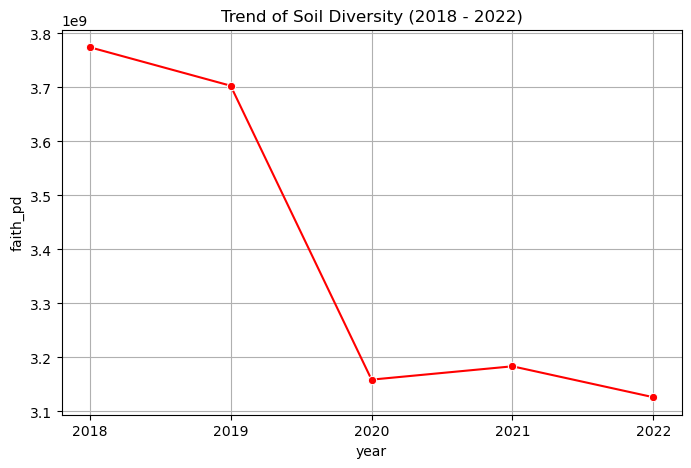

In [23]:
plt.figure(figsize=(8, 5))
yearly_data = df.groupby('year')['faith_pd'].mean().reset_index()
sns.lineplot(x='year', y='faith_pd', data=yearly_data, marker='o', color='red')
plt.title('Trend of Soil Diversity (2018 - 2022)')
plt.xticks(df['year'].unique()) 
plt.grid(True)
plt.show()

#### The temporal analysis shows that average phylogenetic diversity was at its peak in 2018 (3.77e+09) and experienced a slight decline in 2019 (3.70e+09). However, a sharp decrease was observed in 2020, after which diversity levels have remained relatively low through 2022. This downward trajectory highlights a potential decline in the soil's microbial richness over the five-year study period, which warrants further investigation into environmental stressors during those years.